In [2]:
import numpy as np
import pandas as pd

In [3]:
WL_extensions = ['age', 'entry', 'hand', 'ht', 'id', 'ioc', 'name', 'rank', 'rank_points', 'seed']

def obscure_features(DF):
    '''
    We replace 'winner' and 'loser' with 'player_1' and 'player_2' (not necessarily in that order)
    'player_1' replaces the name of the player that comes first alphabetically
    The purpose of this is to predict the winner of a match without the data being tied to
    the known winner or loser.
    '''
    DF['player_1'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).min(axis = 1)
    DF['player_2'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).max(axis = 1)
    
    for ext in WL_extensions:
        p1_feature = np.where(DF['player_1'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        p2_feature = np.where(DF['player_2'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        DF['player_1_' + ext] = p1_feature
        DF['player_2_' + ext] = p2_feature
        
    winner_cols = list(filter(lambda x: x.startswith('winner'), DF.columns))
    loser_cols = list(filter(lambda x: x.startswith('loser'), DF.columns))
    cols_to_drop = winner_cols + loser_cols
    
    target = DF['winner_name']
    
    DF.drop(cols_to_drop, axis = 1, inplace = True)
    
    DF['winner'] = target
    
    return DF

In [4]:
df_list = [pd.read_csv('wta_matches_' + str(year) + '.csv') for year in range(2000,2020)]

In [5]:
matches = obscure_features(pd.concat(df_list, axis = 0))

In [6]:
matches.index = range(matches.shape[0])

In [7]:
rankings_10s = pd.read_csv('wta_rankings_10s.csv', header = None)
rankings_10s.columns = ['week', 'ranking', 'player_id', 'ranking_points', 'tours']

rankings_00s = pd.read_csv('wta_rankings_00s.csv', header = None)
rankings_00s.columns = ['week', 'ranking', 'player_id', 'ranking_points', 'tours']

rankings = pd.concat([rankings_00s, rankings_10s])

rankings.index = range(rankings.shape[0])

rankings

,week,ranking,player_id,ranking_points,tours
0,20000101,1,200001,6074.0,NaN
1,20000103,1,200001,6074.0,NaN
2,20000110,1,200001,6074.0,NaN
3,20000117,1,200001,6003.0,NaN
4,20000124,1,200001,6003.0,NaN
...,...,...,...,...,...
1208119,20141110,1242,223123,3.0,NaN
1208120,20191209,1047,223179,NaN,NaN
1208121,20191216,996,223179,NaN,NaN
1208122,20191223,948,223179,NaN,NaN


In [8]:
rankings['week'] = pd.to_datetime(rankings['week'], format = '%Y%m%d')
rankings.head()

,week,ranking,player_id,ranking_points,tours
0,2000-01-01,1,200001,6074.0,NaN
1,2000-01-03,1,200001,6074.0,NaN
2,2000-01-10,1,200001,6074.0,NaN
3,2000-01-17,1,200001,6003.0,NaN
4,2000-01-24,1,200001,6003.0,NaN


In [9]:
from datetime import timedelta

In [10]:
matches['tourney_date'] = pd.to_datetime(matches.tourney_date, format = '%Y%m%d')
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6(6) 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6(1) 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6(4) 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,GER,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,SUI,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,SUI,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,SUI,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens


In [11]:
import re

In [12]:
#remove rows whose scores contain letters, indicating a retirement, default, or walkover

score_mask = matches['score'].apply(lambda x: bool(re.findall('[a-zA-Z]', x)))
matches = matches[~score_mask]
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6(6) 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6(1) 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6(4) 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,GER,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,SUI,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,SUI,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,SUI,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens


In [13]:
# remove parenthetical portion of score for tie-breakers

scores = matches['score'].copy()
matches['score'] = scores.apply(lambda score: re.sub('\(\d*\)', '', score))
matches

<ipython-input-13-3360d3b89326>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['score'] = scores.apply(lambda score: re.sub('\(\d*\)', '', score))


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,GER,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,SUI,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,SUI,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,SUI,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens


In [14]:
def total_games(s):
    num_list = re.findall('\d+', s)
    num_list = [int(x) for x in num_list]
    return sum(num_list)

matches['total_games'] = matches['score'].apply(total_games)
matches

<ipython-input-14-29b95c48bdb8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['total_games'] = matches['score'].apply(total_games)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li,21
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama,18
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles,21
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport,32
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel,19
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic,17
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens,19
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens,17


In [15]:
matches.index = range(matches.shape[0])
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li,21
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama,18
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles,21
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport,32
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel,19
56283,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic,17
56284,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens,19
56285,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens,17


In [16]:
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li,21
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama,18
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles,21
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport,32
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel,19
56283,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic,17
56284,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens,19
56285,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens,17


In [17]:
matches2 = matches.copy().sort_values(by = ['tourney_date', 'tourney_id', 'match_num'])
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
1995,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13
1996,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17
1997,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14
1998,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19
1999,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54121,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,Aliaksandra Sasnovich,Jil Belen Teichmann,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21
54122,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,Ana Bogdan,Ekaterina Alexandrova,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18
54123,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,Aliaksandra Sasnovich,Greetje Minnen,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24
54124,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,Ekaterina Alexandrova,Nicole Gibbs,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21


In [18]:
matches2.index = range(matches2.shape[0])
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,Aliaksandra Sasnovich,Jil Belen Teichmann,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,Ana Bogdan,Ekaterina Alexandrova,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,Aliaksandra Sasnovich,Greetje Minnen,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,Ekaterina Alexandrova,Nicole Gibbs,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21


In [136]:
# add columns indicating number of games played by player in previous match

# n = matches2.shape[0]

# player_1_prev_games = np.zeros(n)
# player_2_prev_games = np.zeros(n)

# for i in range(n):
#     p1 = matches2.loc[i, 'player_1_name']
#     p2 = matches2.loc[i, 'player_2_name']
    
#     p1_computed = False
#     p2_computed = False
#     for j in range(i-1, -1, -1):
#         if matches2.loc[j, 'tourney_id'] == matches2.loc[i, 'tourney_id']:
#             if (p1 == matches2.loc[j, 'player_1_name'] or p1 == matches2.loc[j, 'player_2_name']) and not p1_computed:
#                 player_1_prev_games[i] = matches2.loc[j, 'total_games']
#                 p1_computed = True
#             if p2 == matches2.loc[j, 'player_1_name'] or p2 == matches2.loc[j, 'player_2_name'] and not p2_computed:
#                 player_2_prev_games[i] = matches2.loc[j, 'total_games']
#                 p2_computed = True
#             if p1_computed and p2_computed:
#                 break
#         else:
#             break

# matches2['player_1_prev_games'] = player_1_prev_games
# matches2['player_2_prev_games'] = player_2_prev_games

In [19]:
# want to add columns containing head-to-heads between players from previous matches.

# first add column with both players' names

matches2['players'] = list(zip(matches2['player_1_name'], matches2['player_2_name']))
matches2

g = matches2.groupby('players')
df_list = []

#group by (player_1_name, player_2_name) and keep running total of wins by each player

for group, df in g:
    df = df[['winner']]
    
    n = df.shape[0]
    
    player_1_h2h = np.zeros(n)
    player_2_h2h = np.zeros(n)
    
    p1 = group[0]
    p2 = group[1]

    for i in range(1,n):
        if df.iloc[i-1,0] == p1:
            player_1_h2h[i] = player_1_h2h[i-1] + 1
            player_2_h2h[i] = player_2_h2h[i-1]
        else:
            player_1_h2h[i] = player_1_h2h[i-1]
            player_2_h2h[i] = player_2_h2h[i-1] + 1
            
    df['player_1_h2h'] = player_1_h2h
    df['player_2_h2h'] = player_2_h2h
    
    df_list.append(df)

<ipython-input-19-9b62f9672b42>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_1_h2h'] = player_1_h2h
<ipython-input-19-9b62f9672b42>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_2_h2h'] = player_2_h2h


In [20]:
# combine the above into single data frame

df_h2h = pd.concat(df_list, axis = 0)
df_h2h

,winner,player_1_h2h,player_2_h2h
36642,Abigail Guthrie,0.0,0.0
36585,Abigail Guthrie,0.0,0.0
5471,Adriana Serra Zanetti,0.0,0.0
21417,Ahsha Rolle,0.0,0.0
16294,Aiko Nakamura,0.0,0.0
...,...,...,...
20259,Yurika Sema,0.0,0.0
20273,Yurika Sema,0.0,0.0
41539,Zarina Diyas,0.0,0.0
22520,Yung Jan Chan,0.0,0.0


In [21]:
df_h2h = df_h2h.drop('winner', axis = 1)
df_h2h

,player_1_h2h,player_2_h2h
36642,0.0,0.0
36585,0.0,0.0
5471,0.0,0.0
21417,0.0,0.0
16294,0.0,0.0
...,...,...
20259,0.0,0.0
20273,0.0,0.0
41539,0.0,0.0
22520,0.0,0.0


In [22]:
#merge with matches2 data frame

matches2 = pd.merge(matches2, df_h2h, left_index = True, right_index = True)
matches2 = matches2.drop('players', axis = 1)
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13,0.0,0.0
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17,0.0,0.0
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14,0.0,0.0
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19,0.0,0.0
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21,0.0,0.0
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18,0.0,0.0
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24,0.0,0.0
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21,0.0,0.0


In [23]:
# impute missing player rankings

n = matches2.shape[0]

p1_rank_missing = matches2['player_1_rank'].isnull()
p2_rank_missing = matches2['player_2_rank'].isnull()

for i in range(n):
    if p1_rank_missing[i]:
        week = matches2.loc[i, 'tourney_date']
        week -= timedelta(week.weekday())
        p1_id = matches2.loc[i, 'player_1_id']
        
        mask = (rankings['week'] == week) & (rankings['player_id'] == p1_id)
        if rankings[mask].shape[0] > 1:
            matches2.loc[i, 'player_1_rank'] = rankings.loc[mask, 'ranking'][0]
            
    if p2_rank_missing[i]:
        week = matches2.loc[i, 'tourney_date']
        week -= timedelta(week.weekday())
        p2_id = matches2.loc[i, 'player_2_id']
        
        mask = (rankings['week'] == week) & (rankings['player_id'] == p2_id)
        if rankings[mask].shape[0] > 1:
            matches2.loc[i, 'player_2_rank'] = rankings.loc[mask, 'ranking'][0]
            
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13,0.0,0.0
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17,0.0,0.0
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14,0.0,0.0
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19,0.0,0.0
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21,0.0,0.0
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18,0.0,0.0
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24,0.0,0.0
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21,0.0,0.0


In [24]:
#rome_indices = matches2[matches2['tourney_id'] == '2004-W-T1-ITA-01A-2004'].index
#matches2[matches2['tourney_id'] == '2004-W-T1-ITA-01A-2004']['player_1_id']

mask = (rankings['week'] == '05-03-2004') & (rankings['player_id'] == 200065)
rankings[mask].index[0]

21112

In [25]:
#rankings from Rome 2004 tournament are missing, for some reason
#impute with rankings from the week before instead

rome_indices = matches2[matches2['tourney_id'] == '2004-W-T1-ITA-01A-2004'].index

for i in rome_indices:
    p1_id = matches2.loc[i, 'player_1_id']
    p2_id = matches2.loc[i, 'player_2_id']
    
    mask = (rankings['week'] == '05-03-2004') & (rankings['player_id'] == p1_id)
    idx = rankings[mask].index[0]
    matches2.loc[i, 'player_1_rank'] = rankings.loc[idx, 'ranking']
        
    mask = (rankings['week'] == '05-03-2004') & (rankings['player_id'] == p2_id)
    idx = rankings[mask].index[0]
    matches2.loc[i, 'player_2_rank'] = rankings.loc[idx, 'ranking']

In [26]:
matches2['target'] = np.where(matches2['winner'] == matches2['player_1_name'],
                              'player_1',
                              'player_2')
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h,target
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13,0.0,0.0,player_2
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17,0.0,0.0,player_2
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14,0.0,0.0,player_1
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19,0.0,0.0,player_1
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27,0.0,0.0,player_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21,0.0,0.0,player_1
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18,0.0,0.0,player_2
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24,0.0,0.0,player_1
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21,0.0,0.0,player_1


In [27]:
matches2[['tourney_date', 'tourney_id', 'match_num', 'player_1_name', 'winner']].isnull().sum()

tourney_date     0
tourney_id       0
match_num        0
player_1_name    0
winner           0
dtype: int64

In [28]:
n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby('player')

df_list = []
for group, df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)

<ipython-input-28-0f36fca0d9dd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-28-0f36fca0d9dd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [29]:
all_players = pd.concat(df_list, axis = 0)

In [30]:
all_players

,tourney_date,match_num,player,winner,category,cumulative_matches,cumulative_wins
36585,2013-02-08,1,Abigail Guthrie,1,1.0,0,0
36642,2013-02-09,1,Abigail Guthrie,1,1.0,1,1
3329,2001-03-05,1,Abigail Spears,1,1.0,0,0
3385,2001-03-05,13,Abigail Spears,0,1.0,1,0
3345,2001-03-05,17,Abigail Spears,0,1.0,2,0
...,...,...,...,...,...,...,...
31580,2011-04-04,2,Zuzana Ondraskova,0,2.0,91,29
31994,2011-05-16,5,Zuzana Ondraskova,0,2.0,92,29
32108,2011-05-23,50,Zuzana Ondraskova,0,2.0,93,29
32346,2011-06-20,19,Zuzana Ondraskova,0,2.0,94,29


In [31]:
for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_matches',
                  'player_' + str(int(group)) + '_wins']
    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

In [32]:
def winpct(x, y):
    if x == 0:
        return 0
    else:
        return y/x

winpct_vec = np.vectorize(winpct, otypes=[np.float])
matches2['player_1_win_pct'] = winpct_vec(matches2['player_1_matches'], matches2['player_1_wins'])
matches2['player_2_win_pct'] = winpct_vec(matches2['player_2_matches'], matches2['player_2_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,total_games,player_1_h2h,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,13,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,17,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,14,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,19,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,27,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,21,0.0,0.0,player_1,168,82,51,24,0.488095,0.470588
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,18,0.0,0.0,player_2,98,42,116,61,0.428571,0.525862
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,24,0.0,0.0,player_1,169,83,16,8,0.491124,0.500000
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,21,0.0,0.0,player_1,117,62,109,43,0.529915,0.394495


In [33]:
n = matches2.shape[0]

player_1_recent_form = np.zeros(n)
player_2_recent_form = np.zeros(n)

for i in range(n):
    p1 = matches2.loc[i, 'player_1_name']
    p2 = matches2.loc[i, 'player_2_name']
    
    current_date = matches2.loc[i, 'tourney_date']
    match_number = matches2.loc[i, 'match_num']
    
    mask1 = matches2['tourney_date'] < current_date
    mask2 = (matches2['tourney_date'] == current_date) & (matches2['match_num'] < match_number)
    mask3 = matches2['tourney_date'] >= current_date - timedelta(180)
    
    recent_matches = matches2[(mask1 | mask2) & mask3]
    
    mask1 = (recent_matches['player_1_name'] == p1) | (recent_matches['player_2_name'] == p1)
    mask2 = (recent_matches['winner'] == p1)
    
    p1_matches = recent_matches[mask1].shape[0]
    p1_wins = recent_matches[mask2].shape[0]
    
    player_1_recent_form[i] = (matches2.loc[i, 'player_1_win_pct']
                               + np.log10(1 - matches2.loc[1, 'player_1_win_pct']
                                          + winpct(p1_matches, p1_wins)))
    
    mask1 = (recent_matches['player_1_name'] == p2) | (recent_matches['player_2_name'] == p2)
    mask2 = (recent_matches['winner'] == p2)
    
    p2_matches = recent_matches[mask1].shape[0]
    p2_wins = recent_matches[mask2].shape[0]
    
    player_2_recent_form[i] = (matches2.loc[i, 'player_2_win_pct']
                               + np.log10(1 - matches2.loc[1, 'player_2_win_pct']
                                          + winpct(p2_matches, p2_wins)))

In [35]:
matches2['player_1_recent_form'] = player_1_recent_form
matches2['player_2_recent_form'] = player_2_recent_form
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct,player_1_recent_form,player_2_recent_form
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,0.0,player_1,168,82,51,24,0.488095,0.470588,0.606195,0.638079
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,0.0,player_2,98,42,116,61,0.428571,0.525862,0.588272,0.735562
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,0.0,player_1,169,83,16,8,0.491124,0.500000,0.622403,0.676091
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,0.0,player_1,117,62,109,43,0.529915,0.394495,0.742989,0.605349


In [36]:
print('number of observations with \'surface\' missing:', matches2['surface'].isnull().sum())

# the matches with 'surface' missing are from a relatively small number of tournaments.
# this makes it feasible to look up these tournaments and impute the exact values.
missing_surface = matches2[matches2['surface'].isnull()][['tourney_name', 'tourney_date']]
for i in missing_surface.index:
    print(str(i)+':', missing_surface.loc[i, 'tourney_name'], missing_surface.loc[i, 'tourney_date'])

number of observations with 'surface' missing: 124
18341: Fed Cup G2 PO: IRL vs GRE 2006-04-29 00:00:00
18342: Fed Cup G2 PO: IRL vs GRE 2006-04-29 00:00:00
20907: Fed Cup G1 PO: UZB vs IND 2007-04-21 00:00:00
20908: Fed Cup G1 PO: UZB vs IND 2007-04-21 00:00:00
20909: Fed Cup G1 PO: NZL vs HKG 2007-04-21 00:00:00
20910: Fed Cup G1 PO: NZL vs HKG 2007-04-21 00:00:00
20911: Fed Cup G1 PO: KOR vs KAZ 2007-04-21 00:00:00
20912: Fed Cup G1 PO: KOR vs KAZ 2007-04-21 00:00:00
23000: Fed Cup G1 PO: NZL vs UZB 2008-02-02 00:00:00
23001: Fed Cup G1 PO: NZL vs UZB 2008-02-02 00:00:00
23018: Fed Cup G1 PO: MEX vs PAR 2008-02-02 00:00:00
23019: Fed Cup G1 PO: MEX vs PAR 2008-02-02 00:00:00
23022: Fed Cup G1 PO: IND vs HKG 2008-02-02 00:00:00
23023: Fed Cup G1 PO: IND vs HKG 2008-02-02 00:00:00
23028: Fed Cup G2 PO: KAZ vs KOR 2008-02-02 00:00:00
23029: Fed Cup G2 PO: PHI vs SIN 2008-02-02 00:00:00
23030: Fed Cup G2 PO: PHI vs SIN 2008-02-02 00:00:00
23031: Fed Cup G2 PO: SYR vs TKM 2008-02-02 00:0

In [37]:
missing_surface_dict = {18341: 'Clay',
                        18342: 'Clay',
                        20907: 'Hard',
                        20908: 'Hard',
                        20909: 'Hard',
                        20910: 'Hard',
                        20911: 'Hard',
                        20912: 'Hard',
                        23000: 'Hard',
                        23001: 'Hard',
                        23018: 'Clay',
                        23019: 'Clay',
                        23022: 'Hard',
                        23023: 'Hard',
                        23028: 'Hard',
                        23029: 'Hard',
                        23030: 'Hard',
                        23031: 'Hard',
                        23032: 'Hard',
                        34517: 'Clay',
                        34518: 'Clay',
                        34519: 'Clay',
                        34520: 'Clay',
                        34521: 'Clay',
                        34522: 'Clay',
                        34523: 'Clay',
                        34524: 'Clay',
                        39936: 'Hard',
                        39937: 'Hard',
                        39938: 'Hard',
                        39939: 'Hard',
                        39940: 'Hard',
                        39941: 'Hard',
                        39942: 'Hard',
                        39943: 'Hard',
                        39944: 'Hard',
                        39945: 'Hard',
                        39946: 'Hard',
                        39947: 'Hard',
                        41734: 'Hard',
                        41735: 'Hard',
                        41736: 'Hard',
                        44676: 'Hard',
                        44677: 'Hard',
                        44678: 'Hard',
                        44679: 'Hard',
                        44680: 'Hard',
                        44681: 'Hard',
                        44682: 'Hard',
                        44683: 'Hard',
                        44712: 'Hard',
                        44713: 'Hard',
                        44714: 'Hard',
                        44715: 'Hard',
                        44716: 'Hard',
                        44717: 'Hard',
                        44718: 'Hard',
                        44719: 'Hard',
                        44748: 'Hard',
                        44749: 'Hard',
                        44750: 'Hard',
                        44751: 'Hard',
                        44752: 'Hard',
                        44753: 'Hard',
                        44754: 'Hard',
                        44755: 'Hard',
                        44784: 'Hard',
                        44785: 'Hard',
                        44786: 'Hard',
                        44787: 'Hard',
                        44788: 'Hard',
                        44789: 'Hard',
                        44790: 'Hard',
                        44791: 'Hard',
                        44818: 'Hard',
                        44819: 'Hard',
                        44820: 'Hard',
                        44821: 'Hard',
                        44822: 'Hard',
                        44823: 'Hard',
                        44824: 'Hard',
                        44825: 'Hard',
                        49231: 'Clay',
                        49232: 'Clay',
                        49233: 'Clay',
                        49234: 'Clay',
                        49235: 'Clay',
                        49236: 'Clay',
                        49237: 'Clay',
                        49238: 'Clay',
                        49239: 'Clay',
                        49240: 'Clay',
                        49241: 'Clay',
                        49242: 'Clay',
                        49243: 'Clay',
                        49244: 'Clay',
                        49245: 'Clay',
                        49246: 'Clay',
                        49247: 'Clay',
                        49248: 'Clay',
                        49249: 'Clay',
                        49250: 'Clay',
                        49281: 'Clay',
                        49282: 'Clay',
                        49283: 'Clay',
                        49284: 'Clay',
                        49285: 'Clay',
                        49286: 'Clay',
                        49287: 'Clay',
                        49288: 'Clay',
                        49289: 'Clay',
                        49290: 'Clay',
                        49299: 'Clay',
                        49300: 'Clay',
                        49301: 'Clay',
                        49302: 'Clay',
                        49303: 'Clay',
                        49304: 'Clay',
                        49305: 'Clay',
                        49306: 'Clay',
                        49307: 'Clay',
                        49308: 'Clay',
                        49309: 'Clay',
                        49310: 'Clay',
                       }

In [38]:
for idx, surface in missing_surface_dict.items():
    matches2.loc[idx, 'surface'] = surface

In [39]:
matches2['surface'].isnull().sum() #all missing 'surface' values imputed

0

In [40]:
# win % on surface

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'surface', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'surface', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'surface', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'surface', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby(['surface', 'player'])

df_list = []
for (group, surface), df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)

<ipython-input-40-1dd2fa8f0c36>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-40-1dd2fa8f0c36>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [41]:
all_players = pd.concat(df_list, axis = 0)
all_players

,tourney_date,match_num,surface,player,winner,category,cumulative_matches,cumulative_wins
5471,2001-09-17,9,Carpet,Abigail Spears,0,1.0,0,0
4073,2001-04-28,2,Carpet,Adriana Serra Zanetti,1,1.0,0,0
4075,2001-04-28,4,Carpet,Adriana Serra Zanetti,1,1.0,1,1
5471,2001-09-17,9,Carpet,Adriana Serra Zanetti,1,2.0,2,2
5481,2001-09-17,19,Carpet,Adriana Serra Zanetti,0,1.0,3,2
...,...,...,...,...,...,...,...,...
30798,2011-01-17,27,Hard,Zuzana Ondraskova,0,2.0,31,6
31346,2011-02-28,11,Hard,Zuzana Ondraskova,0,2.0,32,6
31383,2011-03-07,17,Hard,Zuzana Ondraskova,1,2.0,33,7
31412,2011-03-07,49,Hard,Zuzana Ondraskova,0,2.0,34,7


In [42]:
for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'surface', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_surface_matches',
                  'player_' + str(int(group)) + '_surface_wins']

    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

In [43]:
matches2['player_1_surface_win_pct'] = winpct_vec(matches2['player_1_surface_matches'],
                                                  matches2['player_1_surface_wins'])
matches2['player_2_surface_win_pct'] = winpct_vec(matches2['player_2_surface_matches'],
                                                  matches2['player_2_surface_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_win_pct,player_2_win_pct,player_1_recent_form,player_2_recent_form,player_1_surface_matches,player_1_surface_wins,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,0.488095,0.470588,0.606195,0.638079,123,65,27,10,0.528455,0.370370
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,0.428571,0.525862,0.588272,0.735562,59,26,82,50,0.440678,0.609756
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,0.491124,0.500000,0.622403,0.676091,124,66,10,5,0.532258,0.500000
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,0.529915,0.394495,0.742989,0.605349,83,51,95,41,0.614458,0.431579


In [44]:
matches2['tourney_level'].value_counts()

I     10706
G     10014
P      6854
D      6141
T1     4485
T3     4397
T2     4165
PM     3044
T4     2807
C      1323
T5      890
CC      736
F       401
O       309
W        15
Name: tourney_level, dtype: int64

In [45]:
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T1', 'PM')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T2', 'P')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T3', 'I')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T4', 'I')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T5', 'I')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('W', 'F')
matches2['tourney_level'].value_counts()

I     18800
P     11019
G     10014
PM     7529
D      6141
C      1323
CC      736
F       416
O       309
Name: tourney_level, dtype: int64

In [46]:
# win % at different tourney levels

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'tourney_level', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'tourney_level', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'tourney_level', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'tourney_level', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby(['tourney_level', 'player'])

df_list = []
for (group, tourney_level), df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
    
all_players = pd.concat(df_list, axis = 0)


for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'tourney_level', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_level_matches',
                  'player_' + str(int(group)) + '_level_wins']

    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-46-77ca468a59e1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-46-77ca468a59e1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [47]:
matches2['player_1_level_win_pct'] = winpct_vec(matches2['player_1_level_matches'],
                                                  matches2['player_1_level_wins'])
matches2['player_2_level_win_pct'] = winpct_vec(matches2['player_2_level_matches'],
                                                  matches2['player_2_level_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_matches,player_1_level_wins,player_2_level_matches,player_2_level_wins,player_1_level_win_pct,player_2_level_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,1,6-0 6-1,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,2,6-2 6-3,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,3,6-0 6-2,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,4,6-3 6-4,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,5,6-4 4-6 6-1,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,27,10,0.528455,0.370370,49,24,36,18,0.489796,0.500000
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,82,50,0.440678,0.609756,55,23,57,30,0.418182,0.526316
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,10,5,0.532258,0.500000,50,25,13,7,0.500000,0.538462
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,95,41,0.614458,0.431579,58,31,39,13,0.534483,0.333333


In [48]:
mask = (matches2['player_1_matches'] >= 100) & (matches2['player_2_matches'] >= 100)
matches3 = matches2[mask].copy()

#restrict to matches in which both players have played at least 100 matches
print(matches3.shape[0])
matches3 #we still have 18000+ observations

18185


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_matches,player_1_level_wins,player_2_level_matches,player_2_level_wins,player_1_level_win_pct,player_2_level_win_pct
5250,2001-W-T2-USA-06A-2001,New Haven,Hard,28,P,2001-08-19,24,6-4 6-3,3,QF,...,59,43,0.560976,0.728814,24,14,17,9,0.583333,0.529412
5350,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,98,6-4 7-5,3,R32,...,44,26,0.613636,0.590909,25,18,23,16,0.720000,0.695652
5365,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,113,6-4 6-0,3,R16,...,86,75,0.577778,0.872093,24,16,41,34,0.666667,0.829268
5367,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,115,6-3 0-6 6-3,3,R16,...,86,73,0.488889,0.848837,19,11,36,31,0.578947,0.861111
5372,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,120,6-3 6-3,3,R16,...,64,47,0.543860,0.734375,24,16,38,33,0.666667,0.868421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,2019-1072,Limoges,Hard,32,I,2019-12-16,281,6-4 6-4,3,R32,...,61,25,0.511450,0.409836,115,63,74,36,0.547826,0.486486
56272,2019-1072,Limoges,Hard,32,I,2019-12-16,285,6-4 2-6 6-3,3,R32,...,293,148,0.600000,0.505119,55,28,166,92,0.509091,0.554217
56278,2019-1072,Limoges,Hard,32,I,2019-12-16,291,6-3 6-3,3,R16,...,266,130,0.403226,0.488722,75,36,215,113,0.480000,0.525581
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,95,41,0.614458,0.431579,58,31,39,13,0.534483,0.333333


In [49]:
p1_missing_rank = matches3[matches3['player_1_rank'].isnull()][['player_1_name', 'player_1_id', 'tourney_name', 'tourney_date']]
p1_missing_rank
#there are still some rankings missing
#these are players that were unranked at the time of the match

,player_1_name,player_1_id,tourney_name,tourney_date
19074,Chanda Rubin,200039,Stanford,2006-07-24
19382,Chanda Rubin,200039,US Open,2006-08-28
19592,Chanda Rubin,200039,Luxembourg,2006-09-25
19603,Chanda Rubin,200039,Luxembourg,2006-09-25
19769,Elena Bovina,200764,Moscow,2006-10-09
22703,Jelena Dokic,200120,Hobart,2008-01-07
27314,Kim Clijsters,200079,Cincinnati,2009-08-10
27337,Kim Clijsters,200079,Cincinnati,2009-08-10
27352,Kim Clijsters,200079,Cincinnati,2009-08-10
27391,Kim Clijsters,200079,Toronto,2009-08-17


In [50]:
p2_missing_rank = matches3[matches3['player_2_rank'].isnull()][['player_2_name', 'player_2_id', 'tourney_name', 'tourney_date']]
p2_missing_rank

,player_2_name,player_2_id,tourney_name,tourney_date
12228,Sandrine Testud,200016,Doha,2004-03-01
12239,Sandrine Testud,200016,Doha,2004-03-01
14771,Martina Hingis,200001,Pattaya,2005-01-31
17265,Martina Hingis,200001,Gold Coast,2006-01-02
17274,Martina Hingis,200001,Gold Coast,2006-01-02
17281,Martina Hingis,200001,Gold Coast,2006-01-02
17319,Martina Hingis,200001,Sydney,2006-01-09
22093,Yoon Jeong Cho,201313,US Open,2007-08-27
27275,Meghann Shaughnessy,200046,Los Angeles,2009-08-03
27358,Kim Clijsters,200079,Cincinnati,2009-08-10


In [51]:
# all players above are unranked because of long layoffs
# (coming out of retirement and/or returning from injury)
# imputing a missing ranking with a low ranking uniformly may not accurately reflect the player's level
# e.g. Kim Clijsters won the US Open as an unranked player after returning from a 2+ year retirement
# she was also a top player before her retirement
# imputation strategy: find the player's ranking at the time they played their last match before layoff
# penalize this ranking by the length of the layoff (add 1 to ranking per month)

In [52]:
for i in p1_missing_rank.index:
    player_id = p1_missing_rank.loc[i, 'player_1_id']
    current_date = p1_missing_rank.loc[i, 'tourney_date']
    
    mask1 = (((matches2['tourney_date'] < current_date)
              & (matches2['player_1_id'] == player_id))
             & (~matches2['player_1_rank'].isnull()))
    matches_partial = matches2[mask1]
    last_match = matches_partial.loc[matches_partial.index[-1], 'tourney_date']
    
    mask2 = (rankings['week'] < last_match) & (rankings['player_id'] == player_id)
    rankings_partial = rankings[mask2]
    ranking_to_impute = rankings_partial.loc[rankings_partial.index[-1], 'ranking']
    
    matches3.loc[i, 'player_1_rank'] = ranking_to_impute + round((current_date - last_match).days / 30)
    
for i in p2_missing_rank.index:
    player_id = p2_missing_rank.loc[i, 'player_2_id']
    current_date = p2_missing_rank.loc[i, 'tourney_date']
    
    mask1 = (((matches2['tourney_date'] < current_date)
              & (matches2['player_2_id'] == player_id))
             & (~matches2['player_2_rank'].isnull()))
    matches_partial = matches2[mask1]
    last_match = matches_partial.loc[matches_partial.index[-1], 'tourney_date']
    
    mask2 = (rankings['week'] < last_match) & (rankings['player_id'] == player_id)
    rankings_partial = rankings[mask2]
    ranking_to_impute = rankings_partial.loc[rankings_partial.index[-1], 'ranking']
    
    matches3.loc[i, 'player_2_rank'] = ranking_to_impute + round((current_date - last_match).days / 30)

In [53]:
matches3.loc[p1_missing_rank.index][['player_1_name', 'player_1_rank']] #rankings imputed

,player_1_name,player_1_rank
19074,Chanda Rubin,136.0
19382,Chanda Rubin,138.0
19592,Chanda Rubin,138.0
19603,Chanda Rubin,138.0
19769,Elena Bovina,31.0
22703,Jelena Dokic,394.0
27314,Kim Clijsters,34.0
27337,Kim Clijsters,34.0
27352,Kim Clijsters,34.0
27391,Kim Clijsters,34.0


In [54]:
matches3.loc[p2_missing_rank.index][['player_2_name', 'player_2_rank']] #rankings imputed

,player_2_name,player_2_rank
12228,Sandrine Testud,31.0
12239,Sandrine Testud,31.0
14771,Martina Hingis,38.0
17265,Martina Hingis,49.0
17274,Martina Hingis,49.0
17281,Martina Hingis,49.0
17319,Martina Hingis,50.0
22093,Yoon Jeong Cho,93.0
27275,Meghann Shaughnessy,77.0
27358,Kim Clijsters,32.0


In [55]:
matches3.isnull().sum()[matches3.isnull().sum() > 0] # no columns still containing missingness
                                                     # will be used in the predictive models
                                                     # soon to come

minutes                 13281
w_ace                    4294
w_df                     4310
w_svpt                   4293
w_1stIn                  4293
w_1stWon                 4293
w_2ndWon                 4293
w_SvGms                 12491
w_bpSaved                4296
w_bpFaced                4296
l_ace                    4296
l_df                     4310
l_svpt                   4293
l_1stIn                  4293
l_1stWon                 4293
l_2ndWon                 4293
l_SvGms                 12491
l_bpSaved                4295
l_bpFaced                4295
player_1_entry          16553
player_2_entry          16288
player_1_ht              3979
player_2_ht              3520
player_1_rank_points       61
player_2_rank_points       55
player_1_seed            9298
player_2_seed            9806
dtype: int64

In [56]:
# Some values of 'hand' are missing in the form of a 'U' standing in for 'R' or 'L'

matches3[matches3['player_1_hand'] == 'U']['player_1_name']

23654      Camille Pin
24160      Camille Pin
24247      Camille Pin
24259      Camille Pin
24582      Camille Pin
24645      Camille Pin
25016      Camille Pin
25117      Camille Pin
25483      Camille Pin
26186      Camille Pin
26669      Camille Pin
27465      Camille Pin
37878    Olga Puchkova
38301    Olga Puchkova
Name: player_1_name, dtype: object

In [57]:
matches3[matches3['player_2_hand'] == 'U']['player_2_name']

25825      Camille Pin
25861      Camille Pin
26400      Camille Pin
37788    Olga Puchkova
38563    Olga Puchkova
Name: player_2_name, dtype: object

In [58]:
# Only players for whom handedness is 'U' (unknown) are Camille Pin and Olga Puchkova
# Both are right-handed, so can replace each U with R

matches3['player_1_hand'] = matches3['player_1_hand'].str.replace('U', 'R')
matches3['player_2_hand'] = matches3['player_2_hand'].str.replace('U', 'R')

In [59]:
matches3.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes',
       'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms',
       'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn',
       'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'player_1',
       'player_2', 'player_1_age', 'player_2_age', 'player_1_entry',
       'player_2_entry', 'player_1_hand', 'player_2_hand', 'player_1_ht',
       'player_2_ht', 'player_1_id', 'player_2_id', 'player_1_ioc',
       'player_2_ioc', 'player_1_name', 'player_2_name', 'player_1_rank',
       'player_2_rank', 'player_1_rank_points', 'player_2_rank_points',
       'player_1_seed', 'player_2_seed', 'winner', 'total_games',
       'player_1_h2h', 'player_2_h2h', 'target', 'player_1_matches',
       'player_1_wins', 'player_2_matches', 'player_2_wins',
       'player_1_win_pct', 'player_2_win_pct', 'player_1_recen

In [60]:
X = matches3[['player_1_age',
              'player_2_age',
              'player_1_hand',
              'player_2_hand',
              'player_1_rank',
              'player_2_rank',
              'player_1_h2h',
              'player_2_h2h',
              'player_1_recent_form',
              'player_2_recent_form',
              'player_1_surface_win_pct',
              'player_2_surface_win_pct',
              'player_1_level_win_pct',
              'player_2_level_win_pct'
             ]]

y = matches3['target']

In [61]:
X

,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_rank,player_2_rank,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_win_pct,player_2_level_win_pct
5250,18.354552,25.390828,R,R,14.0,2.0,0.0,2.0,0.860988,1.000595,0.560976,0.728814,0.583333,0.529412
5350,29.691992,18.376454,R,R,21.0,13.0,1.0,1.0,0.877322,0.871237,0.613636,0.590909,0.720000,0.695652
5365,18.376454,20.906229,R,R,13.0,1.0,0.0,1.0,0.866819,1.101975,0.577778,0.872093,0.666667,0.829268
5367,25.968515,25.218344,R,R,27.0,3.0,0.0,3.0,0.712341,1.120085,0.488889,0.848837,0.578947,0.861111
5372,25.464750,25.412731,R,R,19.0,2.0,0.0,0.0,0.785073,1.005230,0.543860,0.734375,0.666667,0.868421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,25.724846,23.186858,R,R,47.0,84.0,0.0,1.0,0.721849,0.591410,0.511450,0.409836,0.547826,0.486486
56272,25.084189,32.224504,R,R,42.0,117.0,0.0,0.0,0.719649,0.594939,0.600000,0.505119,0.509091,0.554217
56278,23.186858,29.691992,R,R,84.0,74.0,1.0,0.0,0.609162,0.665315,0.403226,0.488722,0.480000,0.525581
56285,25.084189,26.787132,R,R,42.0,142.0,0.0,0.0,0.742989,0.605349,0.614458,0.431579,0.534483,0.333333


In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [63]:
mask1 = (matches3['player_1_rank'] < matches3['player_2_rank']) & (matches3['target'] == 'player_1')
mask2 = (matches3['player_2_rank'] < matches3['player_1_rank']) & (matches3['target'] == 'player_2')

matches3[mask1 | mask2].shape[0] / matches3.shape[0]

#66.21% of matches won by higher-ranked player.
#Goal is to exceed this.

0.6621391256530107

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# encode categorical variables (player_1_hand, player_2_hand) with numbers
# this is required for ensembling techniques

In [455]:
lencoder = LabelEncoder()

def numer_label(DF):
    '''
    Assign numeric labels to values in non-numeric columns.
    '''
    categ_cols = ['player_1_hand', 'player_2_hand']
    
    for name in categ_cols:
        DF[name] = lencoder.fit_transform(DF[name])
    return DF

X_train_ens = X_train.copy()
X_test_ens = X_test.copy()

X_train_ens = numer_label(X_train_ens)
X_test_ens = numer_label(X_test_ens)

In [519]:
gbc = GradientBoostingClassifier(max_features = 4,
                                 max_depth = 5,
                                 n_estimators = 500,
                                 min_samples_leaf = 5,
                                 min_samples_split = 10)

gs_params = {'learning_rate': 10**np.linspace(-3,-1,5)}

gs = GridSearchCV(gbc, gs_params, cv = 5)

In [520]:
gs.fit(X_train_ens, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=5, max_features=4,
                                                  min_samples_leaf=5,
                                                  min_samples_split=10,
                                                  n_estimators=500),
             param_grid={'learning_rate': array([0.001     , 0.00316228, 0.01      , 0.03162278, 0.1       ])})

In [524]:
gbc_best = gs.best_estimator_
gbc_best

GradientBoostingClassifier(learning_rate=0.03162277660168379, max_depth=5,
                           max_features=4, min_samples_leaf=5,
                           min_samples_split=10, n_estimators=500)

In [525]:
gbc_best.score(X_train_ens, y_train)

0.7759142150123728

In [526]:
gbc_best.score(X_test_ens, y_test) #improvement on baseline
                                   #some overfitting

0.7047016772064889

In [1]:
sorted(list(zip(X_train_ens.columns, gbc_best.feature_importances_)), key = lambda x: -x[1])

NameError: name 'X_train_ens' is not defined

In [ ]:
## logit = LogisticRegression()

In [513]:
X_train_log = X_train.copy()
X_train_log = pd.get_dummies(X_train_log, drop_first = True)

X_test_log = X_test.copy()
X_test_log = pd.get_dummies(X_test_log, drop_first = True)

In [514]:
logit = LogisticRegression(solver='liblinear')

gs_params = {'C': 10**np.linspace(-2, 2, 26)}

gs = GridSearchCV(logit, gs_params, cv = 5)

In [515]:
gs.fit(X_train_log, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 1.44543977e-02, 2.08929613e-02, 3.01995172e-02,
       4.36515832e-02, 6.30957344e-02, 9.12010839e-02, 1.31825674e-01,
       1.90546072e-01, 2.75422870e-01, 3.98107171e-01, 5.75439937e-01,
       8.31763771e-01, 1.20226443e+00, 1.73780083e+00, 2.51188643e+00,
       3.63078055e+00, 5.24807460e+00, 7.58577575e+00, 1.09647820e+01,
       1.58489319e+01, 2.29086765e+01, 3.31131121e+01, 4.78630092e+01,
       6.91830971e+01, 1.00000000e+02])})

In [516]:
log_best = gs.best_estimator_
log_best

LogisticRegression(C=47.86300923226385, solver='liblinear')

In [517]:
log_best.score(X_train_log, y_train)

0.70552653285675

In [518]:
log_best.score(X_test_log, y_test) # exceeds baseline of 66.21%
                                   # no evidence of overfitting

0.7126752818256805

In [527]:
svc = SVC(kernel = 'linear')

gs_params = {'C': 10**np.linspace(-1,3,5)}

gs = GridSearchCV(svc, gs_params, cv = 5)

In [ ]:
gs.fit(X_train_ens, y_train)

In [ ]:
svc_best = gs.best_estimator_
svc_best

In [ ]:
svc_best.score(X_train_ens, y_train)

In [ ]:
svc_best.score(X_test_ens, y_test)

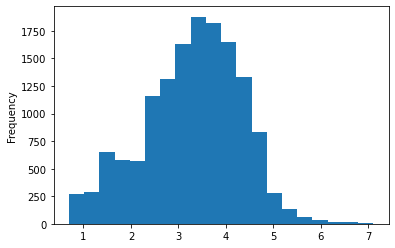

In [471]:
np.log(1 + X_train_log['player_1_rank']).plot.hist(bins = 20)

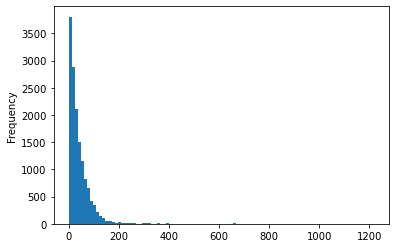

In [490]:
X_train_log['player_1_rank'].plot.hist(bins = 100)

In [481]:
%matplotlib inline
import matplotlib.pyplot as plt

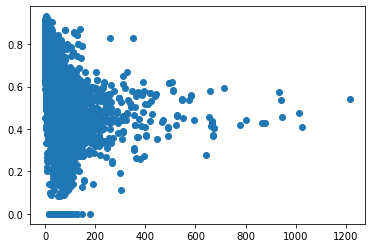

In [488]:
plt.scatter(x = 'player_1_rank', y = 'player_1_surface_win_pct', data = X_train_log)

In [483]:
X_train_log

,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_win_pct,player_2_level_win_pct,player_1_hand_R,player_2_hand_R
34782,22.327173,31.909651,83.0,14.0,1.0,7.0,0.664105,0.738192,0.557895,0.641711,0.555556,0.629032,1,1
52152,27.550992,36.763860,105.0,181.0,0.0,0.0,0.549014,1.112833,0.333333,0.900990,0.347826,0.889552,0,1
48642,30.275154,35.184120,38.0,22.0,4.0,0.0,0.786795,0.655877,0.595092,0.442623,0.524510,0.333333,0,1
18356,30.644764,25.853525,17.0,11.0,2.0,2.0,0.678754,0.797003,0.500000,0.609195,0.431373,0.553191,1,1
38387,21.653662,23.468857,58.0,10.0,0.0,0.0,0.538616,0.870125,0.426966,0.646067,0.391304,0.718310,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39741,27.112936,26.910335,27.0,7.0,1.0,2.0,0.769083,1.025730,0.539924,0.788732,0.486111,0.766467,0,1
41460,26.896646,28.503765,9.0,149.0,0.0,1.0,0.929295,0.548918,0.673077,0.310345,0.687500,0.500000,1,1
25090,22.143737,28.284736,54.0,8.0,0.0,0.0,0.573597,1.098900,0.400000,0.841410,0.464286,0.848739,1,1
10452,27.852156,26.882957,16.0,30.0,1.0,0.0,0.748816,0.740508,0.424242,0.673469,0.479167,0.439024,1,1


In [ ]:
all_players = pd.concat([matches5['player_1_name'], matches5['player_2_name']])
num_matches = all_players.value_counts()
num_matches = num_matches[num_matches >= 100]

mask = matches5['player_1_name'].isin(num_matches.index) & matches5['player_2_name'].isin(num_matches.index)

matches6 = matches5.copy()[mask]
matches6

In [ ]:
mask = matches2['tourney_date'].apply(lambda d: d.year) >= 2010
matches3 = matches2[mask]
matches3

In [ ]:
mask = (~matches3['player_1_rank'].isnull()) & (~matches3['player_2_rank'].isnull())

matches4 = matches3[mask]

n = matches4.shape[0]
matches4.index = range(n)
matches4

In [ ]:
check_missing = matches4.apply(lambda x: x.isnull().sum(), axis = 0)
check_missing[check_missing>0]

#remaining missingness in features that will be used for prediction:

#surface
#age
#hand

#there are few missing values, so hopefully can conduct outside research and impute with exact values.

In [ ]:
# which tournament surfaces are missing?
matches4[matches4['surface'].isna()][['tourney_name', 'tourney_date']]

In [ ]:
matches2['surface'].unique()

In [ ]:
matches4.loc[3593, 'surface'] = 'Clay'
matches4.loc[3594, 'surface'] = 'Clay'
matches4.loc[3595, 'surface'] = 'Clay'
matches4.loc[8776, 'surface'] = 'Hard'
matches4.loc[10546, 'surface'] = 'Hard'
matches4.loc[10547, 'surface'] = 'Hard'
matches4.loc[10548, 'surface'] = 'Hard'
matches4.loc[13456, 'surface'] = 'Hard'
matches4.loc[13481, 'surface'] = 'Hard'
matches4.loc[13505, 'surface'] = 'Hard'
matches4.loc[13506, 'surface'] = 'Hard'
matches4.loc[13507, 'surface'] = 'Hard'
matches4.loc[13553, 'surface'] = 'Hard'
matches4.loc[13554, 'surface'] = 'Hard'
matches4.loc[13555, 'surface'] = 'Hard'
matches4.loc[17867, 'surface'] = 'Clay'

In [ ]:
# which player_1_age is missing?
matches4[matches4['player_1_age'].isna()][['player_1_name', 'tourney_date']]

In [ ]:
matches4.loc[24055, 'player_1_age'] = 19

In [ ]:
# which player_1_hands are missing?
matches5[matches5['player_2_hand'].isna()][['player_2_name']]

In [ ]:
# Both are right-handed
matches4['player_1_hand'].value_counts()

In [ ]:
matches4['player_1_hand'].unique()

# Problem: There are non-missing values where the hand is 'U' (unknown), in addition to missing values.

In [ ]:
matches4[matches4['player_1_hand'].isna()]['player_1_name'].unique()

In [ ]:
matches4[matches4['player_1_hand'].isna()]['player_1_name'].unique()

In [ ]:
matches4[matches4['player_1_hand'] == 'U']['player_1_name'].unique()

In [ ]:
matches4[matches4['player_2_hand'] == 'U']['player_2_name'].unique()

In [ ]:
mask_1 = matches4['player_1_hand'].isnull() | (matches4['player_1_hand'] == 'U')
mask_2 = matches4['player_2_hand'].isnull() | (matches4['player_2_hand'] == 'U')

p1_indices = matches4[mask_1].index
p2_indices = matches4[mask_2].index

for i in p1_indices:
    p1_name = matches4.loc[i, 'player_1_name']
    matches4.loc[i, 'player_1_hand'] = player_hand[p1_name]

for i in p2_indices:
    p2_name = matches4.loc[i, 'player_2_name']
    matches4.loc[i, 'player_2_hand'] = player_hand[p2_name]

In [ ]:
matches4

In [ ]:
matches4.columns

In [ ]:
X = matches5[['tourney_name',
              'surface',
              'tourney_level',
              'round',
              'player_1_age',
              'player_2_age',
              'player_1_hand',
              'player_2_hand',
              'player_1_ioc',
              'player_2_ioc',
              'player_1_rank',
              'player_2_rank',
              'player_1_h2h',
              'player_2_h2h',
              'player_1_recent_form',
              'player_2_recent_form',
              'player_1_prev_min',
              'player_2_prev_min']]

y = matches5['target']

In [ ]:
X.apply(lambda x: x.isnull().sum(), axis = 0) #All missing values imputed.

In [ ]:
matches4.groupby('tourney_level')[['player_1_recent_form', 'player_1_h2h', 'player_1_prev_min', 'player_1_rank']].mean()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
X_train.player_1_prev_min.plot.hist(bins = 20)

In [ ]:
X_train.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

def numer_label(DF):
    '''
    Assign numeric labels to values in non-numeric columns
    to prepare data for gradient boosting regressor.
    '''
    categ_cols = ['tourney_name', 'surface', 'tourney_level',
                  'round', 'player_1_hand', 'player_2_hand',
                  'player_1_ioc', 'player_2_ioc']
    
    for name in categ_cols:
        DF[name] = lencoder.fit_transform(DF[name])
    return DF

X_train_gb = numer_label(X_train)
X_test_gb = numer_label(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc = GradientBoostingClassifier()

gs_params = {'max_features': [2,5,8],
             'max_depth': [3,4,5],
             'n_estimators': [500, 1000, 1500, 2000],
             'learning_rate': np.linspace(.01,1,6)}

gs = GridSearchCV(gbc, gs_params, cv = 5)

In [ ]:
y_train

In [ ]:
y_train_gb = (y_train == 'player_1').astype('int')
y_test_gb = (y_test == 'player_1').astype('int')

In [ ]:
gs.fit(X_train_gb, y_train)

In [ ]:
X_train_gb

In [ ]:
gs

In [ ]:
gs_best = gs.best_estimator_

In [ ]:
gs_best.score(X_train_gb, y_train)

In [ ]:
gs_best.score(X_test_gb, y_test)

In [ ]:
gs_best

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = .01, subsample = 1.0,
                                 max_depth = 8, max_features = 10,
                                 n_estimators = 500)

In [ ]:
gbc.fit(X_train_gb, y_train)

In [ ]:
gbc.score(X_train_gb, y_train)

In [ ]:
gbc.score(X_test_gb, y_test)

In [ ]:
sorted(list(zip(X_train_gb.columns, gbc.feature_importances_)), key = lambda x: -x[1])

In [ ]:
matches4[matches4['tourney_name'].apply(lambda x: x.startswith('Fed Cup WG '))][['player_1', 'player_2']]

In [ ]:
matches4[matches4['tourney_name'].apply(lambda x: x.startswith('Fed Cup WG '))]

In [ ]:
matches4[matches4['tourney_level'] == 'D']

In [ ]:
# Remove challenger and low-level fed cup matches.
# Too many players in these tournaments do not appear regularly in tour matches

mask = ((matches4['tourney_level'] != 'D') | matches4['tourney_name'].apply(lambda x: x.startswith('Fed Cup WG '))) & (matches4['tourney_level'] != 'C')

In [ ]:
matches5 = matches4[mask]

In [ ]:
check_missing = matches5.apply(lambda x: x.isnull().sum(), axis = 0)
check_missing[check_missing>0]

In [ ]:
matches5[matches5['player_1_hand'] == 'U']['player_1_name'].unique()

In [ ]:
matches5[matches5['player_2_hand'] == 'U']['player_2_name'].unique()

In [ ]:
# Corrected dictionary of players whose hand was missing or unknown.

player_hand = {'Ahsha Rolle': 'R',
               'Akvile Parazinskaite': 'R',
               'Alexa Guarachi': 'R',
               'Ana Biskic': 'R',
               'Anastasiya Shoshyna': 'R',
               'Anna Floris': 'L',
               'Anna Lapushchenkova': 'R',
               'Ayano Shimizu': 'R',
               'Beatriz Garcia Vidagany': 'L',
               'Carolina Meligeni Rodrigues Alves': 'R',
               'Catherine Harrison': 'R',
               'Chang Liu': 'R',
               'Claire Liu': 'R',
               'Clara Burel': 'R',
               'Clara Tauson': 'R',
               'Cornelia Lister': 'R',
               'Csilla Borsanyi': 'R',
               'Dalma Galfi': 'R',
               'Daniela Seguel': 'R',
               'Darya Kustova': 'R',
               'Dejana Radanovic': 'R',
               'Deniz Khazaniuk': 'R',
               'Diane Parry': 'R',
               'Eirini Georgatou': 'R',
               'Ekaterina Dzehalevich': 'R',
               'Elena Gabriela Ruse': 'R',
               'Eleonora Molinaro': 'R',
               'Elisabetta Cocciaretto': 'R',
               'Ellie Halbauer': 'R',
               'En Shuo Liang': 'R',
               'Erika Sema': 'R',
               'Eudice Wong Chong': 'R',
               'Fang Ying Xun': 'R',
               'Frances Altick': 'R',
               'Freya Christie': 'R',
               'Georgina Garcia Perez': 'R',
               'Hanna Chang': 'R',
               'Harmony Tan': 'R',
               'Hilary Barte': 'L',
               'Hilda Melander': 'R',
               'Hyun Hui Hong': 'R',
               'Ines Ferrer Suarez': 'R',
               'Ipek Oz': 'L',
               'Jaqueline Adina Cristian': 'R',
               'Jessica Pieri': 'R',
               'Jessika Ponchet': 'R',
               'Jule Niemeier': 'R',
               'Kamilla Farhad': 'R',
               'Kamilla Rakhimova': 'R',
               'Karman Thandi': 'R',
               'Katherine Sebov': 'R',
               'Katie Volynets': 'R',
               'Kimberly Birrell': 'R',
               'Komola Umarova': 'R',
               'Kristina Antoniychuk': 'R',
               'Ksenia Palkina': 'R',
               'Kwan Yau Ng': 'R',
               'Laura Pous Tio': 'R',
               'Lea Boskovic': 'R',
               'Lena Rueffer': 'R',
               'Liana Gabriela Ungur': 'R',
               'Lina Gjorcheska': 'R',
               'Maddison Inglis': 'R',
               'Maegan Manasse': 'R',
               'Mallory Cecil': 'R',
               'Manon Arcangioli': 'R',
               'Mari Osaka': 'R',
               'Maria Camila Osorio Serrano': 'R',
               'Maria Joao Koehler': 'L',
               'Maria Mateas': 'R',
               'Martina Di Giuseppe': 'R',
               'Meiling Wang': 'L',
               'Michaela Pochabova': 'R',
               'Miharu Imanishi': 'R',
               'Mira Antonitsch': 'R',
               'Mirjam Bjorklund': 'R',
               'Nadia Abdala': 'R',
               'Nadia Podoroska': 'R',
               'Natalie Grandin': 'L',
               'Nicole Rottmann': 'R',
               'Olga Ianchuk': 'R',
               'Olga Puchkova': 'R',
               'Olga Saez Larra': 'R',
               'Olivia Sanchez': 'R',
               'Paula Zabala': 'R',
               'Peangtarn Plipuech': 'R',
               'Pei Chi Lee': 'R',
               'Prarthana G Thombare': 'R',
               'Rebeka Masarova': 'R',
               'Sandra Zahlavova': 'R',
               'Sarah Gronert': 'R',
               'Simona Waltert': 'R',
               'Tena Lukas': 'R',
               'Tomoko Yonemura': 'R',
               'Tornado Alicia Black': 'R',
               'Valentini Grammatikopoulou': 'R',
               'Valeriya Strakhova': 'R',
               'Vanda Lukacs': 'R',
               'Varvara Gracheva': 'R',
               'Veronika Kapshay': 'R',
               'Victoria Rodriguez': 'R',
               'Wushuang Zheng': 'R',
               'Xiaodi You': 'R',
               'Xin Yu Wang': 'R',
               'Xinyu Gao': 'R',
               'Yi Jing Zhao': 'L',
               'Ying Zhang': 'R',
               'Ylena In Albon': 'R',
               'Yue Yuan': 'R',
               'Yue Yue Hu': 'R',
               'Yvonne Neuwirth': 'R',
               'Zoe Hives': 'R'}

In [ ]:
mask_1 = matches5['player_1_hand'].isnull() | (matches5['player_1_hand'] == 'U')
mask_2 = matches5['player_2_hand'].isnull() | (matches5['player_2_hand'] == 'U')

p1_indices = matches5[mask_1].index
p2_indices = matches5[mask_2].index

for i in p1_indices:
    p1_name = matches5.loc[i, 'player_1_name']
    matches5.loc[i, 'player_1_hand'] = player_hand[p1_name]

for i in p2_indices:
    p2_name = matches5.loc[i, 'player_2_name']
    matches5.loc[i, 'player_2_hand'] = player_hand[p2_name]

In [ ]:
matches5

In [ ]:
matches5['player_2_hand'].unique()

In [ ]:
X = matches5[['tourney_name',
              'surface',
              'tourney_level',
              'round',
              'player_1_age',
              'player_2_age',
              'player_1_hand',
              'player_2_hand',
              'player_1_ioc',
              'player_2_ioc',
              'player_1_rank',
              'player_2_rank',
              'player_1_h2h',
              'player_2_h2h',
              'player_1_recent_form',
              'player_2_recent_form',
              'player_1_prev_min',
              'player_2_prev_min']].copy()

y = matches5['target'].copy()

In [ ]:
check_missing = X.apply(lambda x: x.isnull().sum(), axis = 0)
check_missing[check_missing>0]

In [ ]:
matches5[matches5['surface'].isnull()][['tourney_name', 'tourney_date']]

In [ ]:
for i in range(13097, 13100):
    X.loc[i, 'surface'] = 'Hard'

In [ ]:
check_missing = X.apply(lambda x: x.isnull().sum(), axis = 0)
check_missing[check_missing>0] #no more missing values

In [ ]:
all_players = pd.concat([matches5['player_1_name'], matches5['player_2_name']])
num_matches = all_players.value_counts()
num_matches = num_matches[num_matches >= 100]

mask = matches5['player_1_name'].isin(num_matches.index) & matches5['player_2_name'].isin(num_matches.index)

matches6 = matches5.copy()[mask]
matches6

In [ ]:
n = matches6.shape[0]

matches6.index = range(n)
matches6

In [ ]:
# add column indicating whether player played long match (i.e. 3-set match) in previous match in tournament
# 0 for no, 1 for yes

n = matches6.shape[0]

player_1_long_match = np.zeros(n)
player_2_long_match = np.zeros(n)

for i in range(n):
    p1 = matches6.loc[i, 'player_1_name']
    p2 = matches6.loc[i, 'player_2_name']
    
    prev_match_p1 = False
    prev_match_p2 = False
    
    j = i-1
    while j>=0 and (not prev_match_p1) and  (matches6.loc[j, 'tourney_id'] == matches6.loc[i, 'tourney_id']):
        prev_match_p1 = (matches6.loc[j, 'player_1_name'] == p1) or (matches6.loc[j, 'player_2_name'] == p1)
        if prev_match_p1:
            num_sets = len(re.findall('-', matches6.loc[j, 'score'])) #number of sets played in match
            player_1_long_match[i] = int(num_sets > 2)
        j -= 1
        
    j = i-1      
    while j>=0 and (not prev_match_p2) and  (matches6.loc[j, 'tourney_id'] == matches6.loc[i, 'tourney_id']) and j>=0:
        prev_match_p2 = (matches6.loc[j, 'player_1_name'] == p2) or (matches6.loc[j, 'player_2_name'] == p2)
        if prev_match_p2:
            num_sets = len(re.findall('-', matches6.loc[j, 'score'])) #number of sets played in match
            player_2_long_match[i] = int(num_sets > 2)
        j -= 1

matches6['player_1_long_match'] = player_1_long_match
matches6['player_2_long_match'] = player_2_long_match

In [ ]:
matches6[matches6['surface'].isnull()]

In [ ]:
for i in range(7700, 7703):
    matches6.loc[i, 'surface'] = 'Hard'

# MODELS

In [ ]:
X = matches6[['surface',
              'tourney_level',
              'player_1_name',
              'player_2_name',
              'player_1_age',
              'player_2_age',
              'player_1_rank',
              'player_2_rank',
              'player_1_h2h',
              'player_2_h2h',
              'player_1_recent_form',
              'player_2_recent_form',
              'player_1_long_match',
              'player_2_long_match']].copy()

y = matches6['target'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

def numer_label(DF):
    '''
    Assign numeric labels to values in non-numeric columns
    to prepare data for gradient boosting regressor.
    '''
    categ_cols = ['surface', 'tourney_level', 'player_1_name', 'player_2_name']
    
    for name in categ_cols:
        DF[name] = lencoder.fit_transform(DF[name])
    return DF

X_train_gb = numer_label(X_train.copy())
X_test_gb = numer_label(X_test.copy())

In [ ]:
mask1 = (matches6['player_1_rank'] < matches6['player_2_rank']) & (matches6['target'] == 'player_1')
mask2 = (matches6['player_2_rank'] < matches6['player_1_rank']) & (matches6['target'] == 'player_2')

matches6[mask1 | mask2].shape[0] / matches6.shape[0] #63.80% of matches won by higher-ranked player
                                                     #Want to exceed this in predictive models.

In [ ]:
gcb = GradientBoostingClassifier()

In [ ]:
gs_params = {'max_depth': [5],
             'n_estimators': [500],
             'learning_rate': [.01],
             'min_samples_leaf': [2, 5, 10],
             'min_samples_split': [20, 40, 60]}

gs = GridSearchCV(gbc, gs_params, cv = 5)

In [ ]:
gs.fit(X_train_gb, y_train)

In [ ]:
gs_best = gs.best_estimator_
gs_best

In [ ]:
gs_best.score(X_train_gb, y_train)

In [ ]:
gs_best.score(X_test_gb, y_test)

In [ ]:
# feature importances

sorted(list(zip(X_train.columns ,gs_best.feature_importances_)), key = lambda x: -x[1])

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = .01,
                                 max_depth = [8],
                                 max_features = 2,
                                 n_estimators = 1000
                                )

In [ ]:
gbc.fit(X_train_gb, y_train)

In [ ]:
print(gbc.score(X_train_gb, y_train))
print(gbc.score(X_test_gb, y_test))

In [ ]:
sorted(list(zip(X_train_gb.columns, gbc.feature_importances_)), key = lambda x: -x[1])

In [ ]:
X_train.player_1_recent_form.plot.hist()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.scatter(x = X_train['player_1_rank'], y = X_train['player_2_rank'])

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.get_params()

In [ ]:
X_num = numer_label(X)

In [ ]:
paramDict = {'C': 10**np.linspace(0, 4, 5), 'degree': [1,2,3]}
gs = GridSearchCV(svm, paramDict, cv=5, return_train_score = True)

In [ ]:
gs.fit(X_train_gb, y_train)

In [ ]:
svc_best = gs.best_estimator_
svc_best

In [ ]:
(svc_best.score(X_train_gb, y_train), svc_best.score(X_test_gb, y_test))

paramDict = {'C': np.linspace(0.01, 1, 10), 'gamma': np.linspace(1e-3,1,10)}
grid = GridSearchCV(svm, paramDict, cv=3, return_train_score = True)
ans  = grid.fit(X, y)

In [ ]:
X

linear

In [ ]:
X_2 = X[['surface', 'tourney_level', 'round', 'player_1_hand', 'player_2_hand',
         'player_1_rank', 'player_2_rank', 'player_1_h2h', 'player_2_h2h',
         'player_1_recent_form', 'player_2_recent_form',
         'player_1_prev_min', 'player_2_prev_min']]
X_linear = pd.get_dummies(X_2, drop_first=True)

In [ ]:
X_linear

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression(max_iter = 1000)
logit.set_params(C = .01)
logit.fit(X_linear, y)

In [ ]:
logit.score(X_linear, y)

In [ ]:
X_linear

In [ ]:
X[(X['player_1_prev_min'] == 0) & (X['player_1_prev_min'] == 0)]

In [ ]:
matches5

In [ ]:
mask1 = (matches5['player_1_rank'] < matches5['player_2_rank']) & (matches5['target'] == 'player_1')
mask2 = (matches5['player_2_rank'] < matches5['player_1_rank']) & (matches5['target'] == 'player_2')

matches5[mask1 | mask2].shape[0] / matches5.shape[0] #65.32% of matches won by higher-ranked player
                                                     #Want to exceed this in predictive models.

In [ ]:
mask3 = (matches5['player_1_recent_form'] > matches5['player_2_recent_form']) & (matches5['target'] == 'player_1')
mask4 = (matches5['player_2_recent_form'] > matches5['player_1_recent_form']) & (matches5['target'] == 'player_2')

matches5[mask3 | mask4].shape[0] / matches5.shape[0]

In [ ]:
matches5[(mask3 & mask1) | (mask2 & mask4)].shape[0] / matches5.shape[0]

In [ ]:
matches5.columns

In [ ]:
all_players = pd.concat([matches5['player_1_name'], matches5['player_2_name']])
num_matches = all_players.value_counts()
num_matches = num_matches[num_matches >= 100]

In [ ]:
mask = matches5['player_1_name'].isin(num_matches.index) & matches5['player_2_name'].isin(num_matches.index)

In [ ]:
matches5[mask]

In [ ]:
matches5[mask]['player_1_prev_min'].plot.hist(bins = 100)

In [ ]:
matches5['player_1_prev_min'][matches5['player_1_prev_min'] >= 120]

In [ ]:
# replace "prev min" with "played long match" or "played three-setter"
# consider only players with min. 100 matches. still leaves 15,000+ observations
# and removes lots of zeros

In [ ]:
# Need to connect players to surface, tourney level
# do this by finding win% by surface/tourney level

In [ ]:
matches6['tourney_level'] = matches6['tourney_level'].str.replace('W', 'F')

#WTA finals are labeled "W" instead of "F" in one year. Fix this.

In [ ]:
matches6['tourney_level'].value_counts()

In [ ]:
# random forest